## GRIP Task 2: To Explore Supervised Machine Learning (Decision Tree)
### By Soham More
### Problem:  Prediction of the IRIS class

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

import graphviz

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [3]:
iris = pd.read_csv('G:/Users/Soham More/Desktop/Study/Data science projects/Datasets/iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
iris.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [8]:
iris.drop('Id',axis=1, inplace=True)

### Visualizations

Text(0.5, 1.0, 'Parallel coordinates plotting for Species')

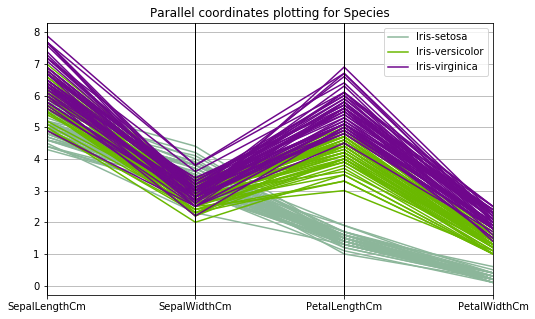

In [9]:
plt.figure(figsize=(8,5))
pd.plotting.parallel_coordinates(iris, 'Species');
plt.title("Parallel coordinates plotting for Species")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Pairplot for each feature')

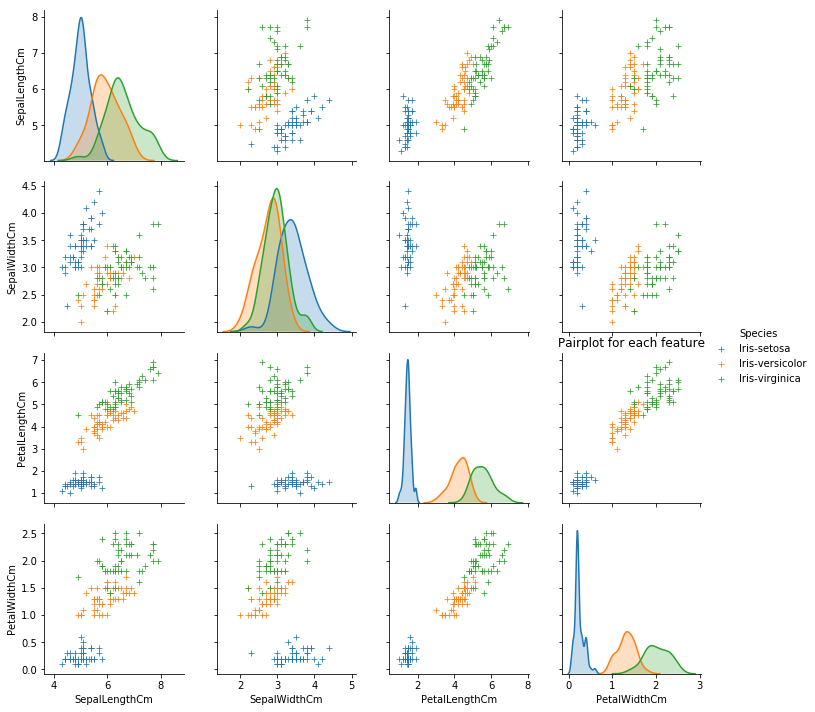

In [10]:
sns.pairplot(iris, hue='Species', markers='+');
plt.title("Pairplot for each feature")

### Train test split

In [11]:
X = iris.drop('Species', axis=1)
y = iris['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [12]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### Classifier and prediction

In [13]:
# classifier
clf = tree.DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
pred = clf.predict(X_test)

In [15]:
print(" Accuracy = {}".format(metrics.accuracy_score(y_test, pred)))

 Accuracy = 0.9666666666666667


In [16]:
df = pd.DataFrame({'Predictions':pred,'Actual':y_test})

In [17]:
df.head()

,Predictions,Actual
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica


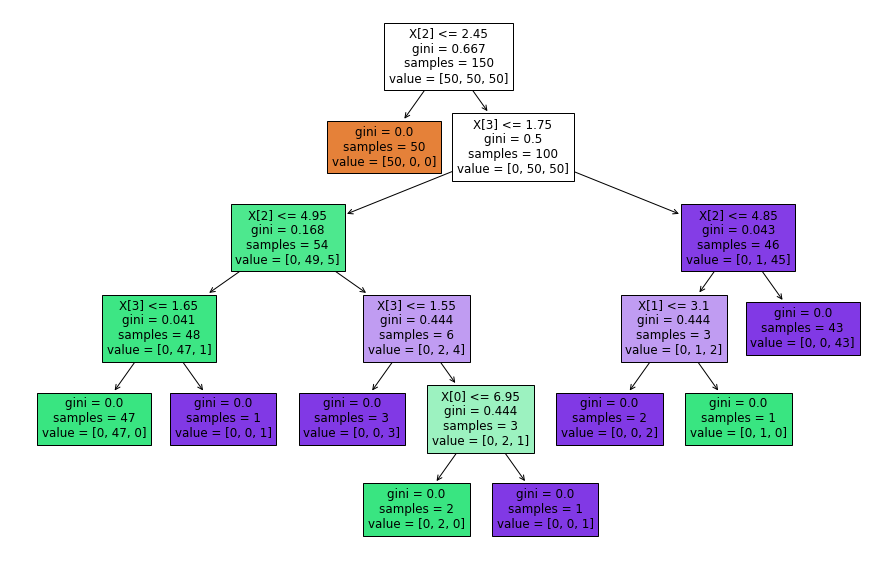

In [22]:
clf = clf.fit(X, y)
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True);